In [3]:
import numpy as np
import pandas as pd
import pastas as ps
import scipy.io as sc
import matplotlib.pyplot as plt

# Load Data from Raam

In [4]:
# Waterlevel River Maas
ws_maas = ps.read_waterbase("C:/Users/Artesia/Downloads/20170621_006.csv", kind="waterlevel")
ws_sambeek = ps.TimeSeries(ws_maas[-2].series['1950-01-02 00:00:00':].resample('D').mean()*1e-2)

INFO: User provided frequency for time series Gennep: freq=10min
INFO: Time Series Gennep: 2433772 nan-value(s) was/were found and filled with: interpolate.
INFO: User provided frequency for time series Sambeek beneden: freq=10min
INFO: Time Series Sambeek beneden: 3156239 nan-value(s) was/were found and filled with: interpolate.
INFO: User provided frequency for time series Well Dorp: freq=10min
INFO: User provided frequency for time series Grave boven: freq=10min
INFO: Time Series Grave boven: 2435741 nan-value(s) was/were found and filled with: interpolate.
INFO: User provided frequency for time series Beugen: freq=10min
INFO: Time Series Beugen: 269984 nan-value(s) was/were found and filled with: interpolate.
INFO: User provided frequency for time series Boxmeer: freq=10min
INFO: Time Series Boxmeer: 1627483 nan-value(s) was/were found and filled with: interpolate.
INFO: User provided frequency for time series Mook haven: freq=10min
INFO: Time Series Mook haven: 86944 nan-value(s) 

In [6]:
# KNMI Precipitation & Evaporation
knmi = sc.loadmat("C:/Users/Artesia/Downloads/leesKnmiRaam.mat", squeeze_me=True, struct_as_record=False, chars_as_strings=True)

prec = []
for H in knmi["knmiN"]:
    name = H.NAME + "_N"
    x, y = H.x, H.y
    metadata = {"x": x, "y": y}
    tindex = [ps.utils.datenum_to_datetime(tval) for tval in H.RD[:, 0]]
    series = pd.Series(H.RD[:, 1], index=tindex, name=name)
    series.index = series.index.round("D")
    prec.append(ps.TimeSeries(series, freq="D", freq_original="D"))

evap = []
for H in knmi["knmi"]:
    name = H.NAME + "_E"
    x, y = H.x, H.y
    metadata = {"x": x, "y": y}
    tindex = [ps.utils.datenum_to_datetime(tval) for tval in H.EV24[:, 0]]
    series = pd.Series(H.EV24[:, 1], index=tindex, name=name)
    series.index = series.index.round("D")
    evap.append(ps.TimeSeries(series, freq="D", freq_original="D"))

INFO: User provided frequency for time series Arcen_N: freq=D
INFO: Time Series Arcen_N: 1 nan-value(s) was/were found and filled with: interpolate.
INFO: User provided frequency for time series Heumen_N: freq=D
INFO: Time Series Heumen_N: 1 nan-value(s) was/were found and filled with: interpolate.
INFO: User provided frequency for time series IjsselsteynL_N: freq=D
INFO: Time Series IjsselsteynL_N: 1 nan-value(s) was/were found and filled with: interpolate.
INFO: User provided frequency for time series Megen_N: freq=D
INFO: Time Series Megen_N: 1 nan-value(s) was/were found and filled with: interpolate.
INFO: User provided frequency for time series Mill_N: freq=D
INFO: Time Series Mill_N: 1 nan-value(s) was/were found and filled with: interpolate.
INFO: User provided frequency for time series Oss_N: freq=D
INFO: Time Series Oss_N: 1 nan-value(s) was/were found and filled with: interpolate.
INFO: User provided frequency for time series Siebengewald_N: freq=D
INFO: Time Series Siebengew

In [7]:
# Groundwater Levels
men = sc.loadmat("C:/Users/Artesia/Downloads/grwoverlastRaam_schoon.men", squeeze_me=True, struct_as_record=False, chars_as_strings=True)

oseries = []
for H in men["H"]:
    name = H.NITGCode + "_" + str(H.filtnr)
    metadata = { "x": H.xcoord, "y": H.ycoord, "z": np.mean([H.upfiltlev,H.lowfiltlev])}
    tindex = [ps.utils.datenum_to_datetime(tval) for tval in H.values[:, 0]]
    series = pd.Series(H.values[:, 1], index=tindex, name=name)
    oseries.append(series)

In [8]:
# Pumping Wells
fname = 'C:/Users/Artesia/Downloads/menyanthes_invoer_jan17.men'
mat = sc.loadmat(fname, struct_as_record=False, squeeze_me=True, chars_as_strings=True)

well = []
for H in mat['IN']:
    key = H.name
    if key in ["Onttrekking (Boxmeer)", "Onttrekking (Vierlingsbeek)"]:
        key = key.replace(" (", "_")
        key = key.replace(")", "")
        tindex = [ps.utils.datenum_to_datetime(tval) for tval in H.values[:, 0]]
        series = pd.Series(H.values[:, 1], index=tindex)
        metadata = {"x": H.xcoord, "y": H.ycoord}
        well.append(ps.TimeSeries(series, name=key, metadata=metadata, settings="well"))

INFO: Inferred frequency for time series Onttrekking_Boxmeer: freq=MS
INFO: Inferred frequency for time series Onttrekking_Vierlingsbeek: freq=MS


In [9]:
# Surface Waterlevels
data = pd.read_csv("C:/Users/Artesia/Downloads/owaterstanden_Raam.csv", skiprows=140, usecols=["LOCATIE", "PEIL DATUM TIJD", "STAND (NAP)"], parse_dates=True, index_col="LOCATIE")
data1 = pd.read_csv("C:/Users/Artesia/Downloads/owaterstanden_Raam.csv", skiprows=6, nrows=132, index_col="LOCATIE", usecols=["LOCATIE", "X COORDINAAT", "Y COORDINAAT"])

waterlevels = []
for key in np.unique(data.index):
    series = pd.Series(data.loc[key, "STAND (NAP)"].values*1e-2, pd.to_datetime(data.loc[key, "PEIL DATUM TIJD"].values))
    metadata = {"x": data1.loc[key, "X COORDINAAT"], "y": data1.loc[key, "Y COORDINAAT"]}
    waterlevels.append(series)
    

In [50]:
    ws_well = ps.TimeSeries(ws_maas[10].series['1950-01-02 00:00:00':].resample('D').mean()*1e-2)
    
    

INFO: Inferred frequency for time series Well dorp: freq=D


In [49]:
    ws_maas[10]
    

TimeSeries(name=Well dorp, freq=None, freq_original=10min, tmin=1983-12-01 08:00:00, tmax=2017-04-18 23:50:00)

In [21]:
for i in range(len(oseries)):
    if oseries[i].name == 'B52E0254_1':
        ho_orig = oseries[i]

In [22]:
index = ps.utils.get_sample(ho_orig.index, ho_orig.asfreq('14d').index)
ho = ho_orig[index]

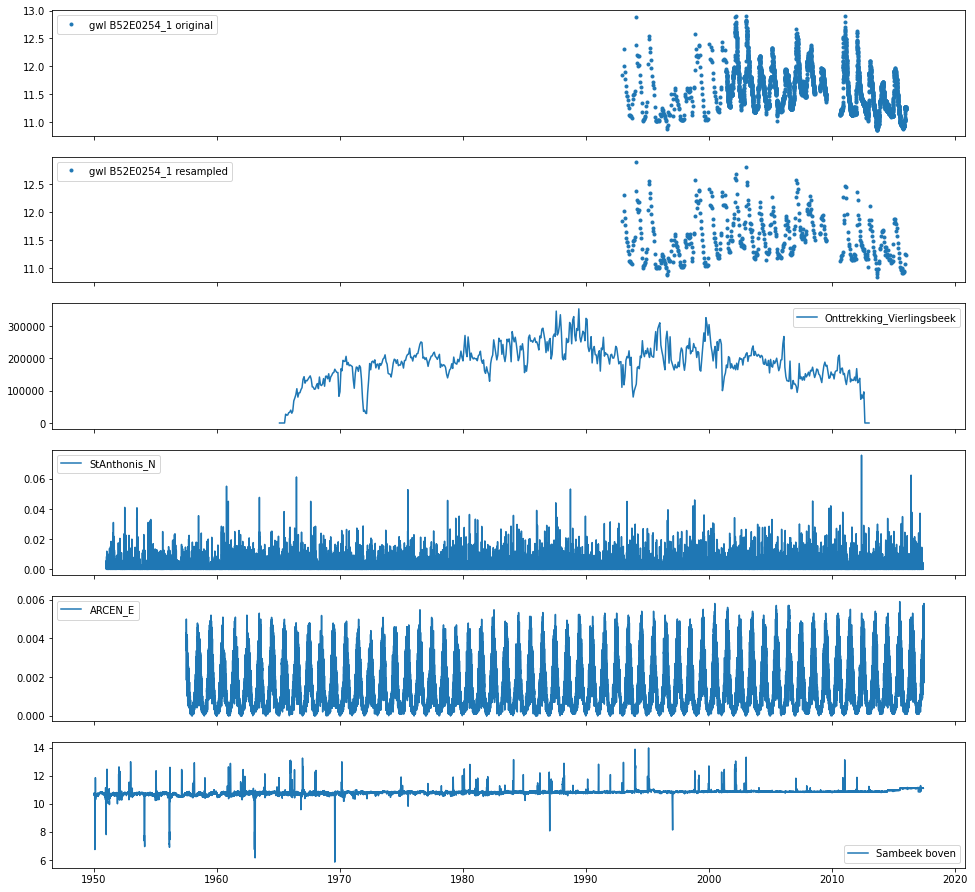

In [23]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(13.5, 12.5)
fig.tight_layout()

ax[0].plot(ho_orig.index, ho_orig, '.', label=f'gwl {ho_orig.name} original')
ax[1].plot(ho.index, ho, '.', label=f'gwl {ho.name} resampled')
ax[2].plot(well[1].series.index, well[1].series, label=well[1].name)
ax[3].plot(prec[-3].series.index, prec[-3].series, label=prec[-3].name)
ax[4].plot(evap[1].series.index, evap[1].series, label=evap[1].name)
ax[5].plot(ws_sambeek.series.index, ws_sambeek.series, label=ws_sambeek.name)

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend();

# Pastas - Original Riverlevels (linear recharge model)

INFO: Cannot determine frequency of series B52E0254_1: freq=None. The time series is irregular.
INFO: Time Series B52E0254_1: 3 nan-value(s) was/were found and filled with: drop.


Fit report B52E0254_1            Fit Statistics
nfev     23                     EVP          78.50
nobs     532                    R2            0.78
noise    True                   RMSE          0.19
tmin     1992-12-14 00:00:00    AIC          12.19
tmax     2015-12-28 00:00:00    BIC          50.68
freq     D                      Obj           1.97
warmup   3650 days 00:00:00     ___               
solver   LeastSquares           Interpolated    No

Parameters (9 were optimized)
                optimal   stderr     initial  vary
rech_A       420.042029  ±16.53%  210.779579  True
rech_n         1.283321   ±5.11%    1.000000  True
rech_a       107.768404  ±17.95%   10.000000  True
rech_f        -1.016441  ±13.51%   -1.000000  True
maas_well_A    0.454502   ±9.85%    2.028323  True
maas_well_n    1.041238   ±9.57%    1.000000  True
maas_well_a   17.165399  ±19.67%   10.000000  True
constant_d     6.264390   ±7.86%   11.542594  True
noise_alpha  129.843784  ±20.73%   14.000000  True

Pa

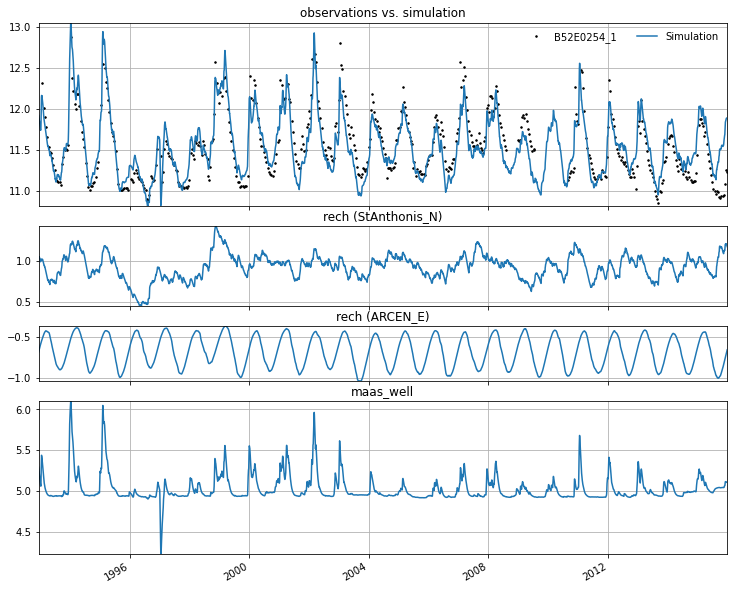

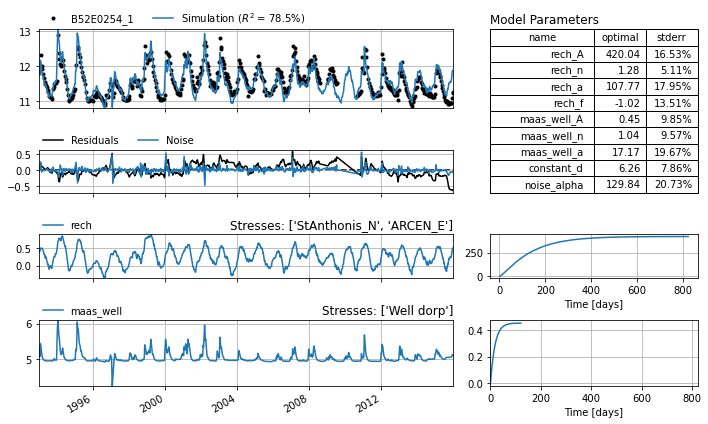

In [55]:
ml1 = ps.Model(ho)
sm1 = ps.RechargeModel(prec[-3], evap[1], ps.Gamma, name='rech')
sm2 = ps.StressModel(ws_well, ps.Gamma, name='maas_well')
ml1.add_stressmodel([sm1, sm2])
ml1.solve(noise=True)
ml1.plots.decomposition();
ml1.plots.results(figsize=(10, 6), adjust_height=True);

INFO: Cannot determine frequency of series B52E0254_1: freq=None. The time series is irregular.
INFO: Time Series B52E0254_1: 3 nan-value(s) was/were found and filled with: drop.
INFO: Inferred frequency for time series Well dorp: freq=D


Fit report B52E0254_1             Fit Statistics
nfev     47                     EVP           78.49
nobs     532                    R2             0.78
noise    True                   RMSE           0.19
tmin     1992-12-14 00:00:00    AIC           12.19
tmax     2015-12-28 00:00:00    BIC           50.68
freq     D                      Obj            1.98
warmup   3650 days 00:00:00     ___                
solver   LeastSquares           Interpolated     No

Parameters (9 were optimized)
                   optimal    stderr  initial  vary
rech_A             397.218   ±18.19%   210.78  True
rech_n             1.26032    ±4.87%        1  True
rech_a             102.426   ±18.43%       10  True
rech_f            -1.01492   ±13.18%       -1  True
ws_well_norm_A    0.630459   ±11.29%        1  True
ws_well_norm_a     975.227  ±855.87%       10  True
ws_well_norm_b  0.00574814  ±863.81%        1  True
constant_d         11.3095    ±1.03%  11.5426  True
noise_alpha        129.688   ±20.74%

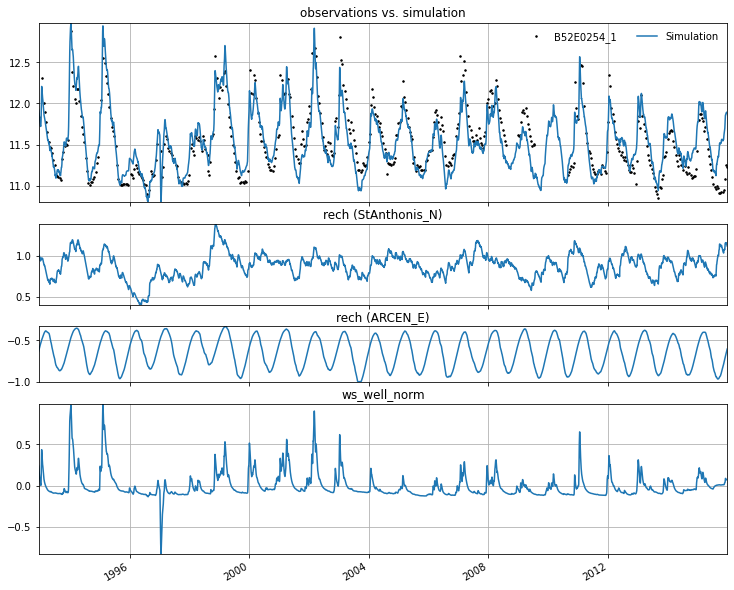

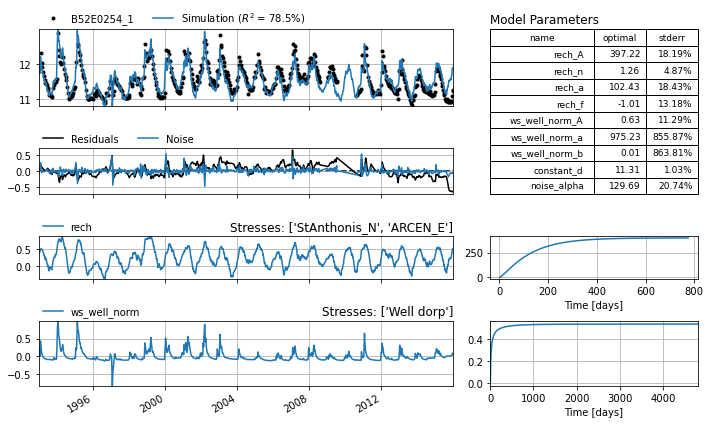

In [54]:
ws_well_norm =  ws_well.series - np.mean(ws_well.series)
ml1 = ps.Model(ho)
sm1 = ps.RechargeModel(prec[-3], evap[1], ps.Gamma, name='rech')
sm2 = ps.StressModel(ws_well_norm, ps.Polder, name='ws_well_norm')
ml1.add_stressmodel([sm1,sm2])
ml1.solve(noise=True)
ml1.plots.decomposition();
ml1.plots.results(figsize=(10, 6), adjust_height=True);

TimeSeries(name=Well Dorp, freq=None, freq_original=10min, tmin=2017-05-24 00:00:00, tmax=2017-06-01 23:50:00)

# Normalize River Levels

In [16]:
ws_sambeek_norm =  ws_sambeek.series - np.mean(ws_sambeek.series)

In [17]:
ws_sambeek_norm


1950-01-02   -0.184452
1950-01-03   -0.129128
1950-01-04   -0.066443
1950-01-05   -0.133249
1950-01-06   -0.114244
                ...   
2017-05-28    0.287654
2017-05-29    0.303001
2017-05-30    0.299876
2017-05-31    0.287376
2017-06-01    0.285085
Freq: D, Name: Sambeek boven, Length: 24623, dtype: float64

# Pastas - Normalized Riverlevels (linear recharge model)

In [18]:
ml2 = ps.Model(ho)
sm1 = ps.RechargeModel(prec[-3], evap[1], ps.Gamma, name='rech')
sm2 = ps.StressModel(ws_sambeek_norm, ps.Polder, name='maas_sambeek')
sm3 = ps.StressModel(well[1], ps.Hantush, name='well_vierlingsbeek', settings='well', up=False)
ml2.add_stressmodel([sm1,sm2,sm3])
ml2.solve(noise=True)

INFO: Cannot determine frequency of series B52B0389_1: freq=None. The time series is irregular.
INFO: Time Series B52B0389_1: 18 nan-value(s) was/were found and filled with: drop.
INFO: Inferred frequency for time series Sambeek boven: freq=D
INFO: Time Series Onttrekking_Vierlingsbeek were sampled up using bfill.
INFO: Time Series StAnthonis_N was extended to 1950-04-18 00:00:00 with the mean value of the time series.
INFO: Time Series ARCEN_E was extended to 1950-04-18 00:00:00 with the mean value of the time series.
INFO: Time Series Onttrekking_Vierlingsbeek were sampled up using bfill.
INFO: Time Series Onttrekking_Vierlingsbeek was extended to 1950-04-18 00:00:00 by adding 0.0 values.
INFO: Time Series Onttrekking_Vierlingsbeek was extended to 2017-01-06 00:00:00 by adding 0.0 values.


Fit report B52B0389_1                        Fit Statistics
nfev     50                     EVP                      86.50
nobs     1172                   R2                        0.86
noise    True                   RMSE                      0.24
tmin     1960-04-15 00:00:00    AIC                      15.63
tmax     2017-01-06 00:00:00    BIC                      76.43
freq     D                      Obj                       6.01
warmup   3650 days 00:00:00     ___                           
solver   LeastSquares           Interpolated                No

Parameters (12 were optimized)
                          optimal    stderr      initial  vary
rech_A                    1413.87    ±7.66%       210.78  True
rech_n                    1.24628    ±1.94%            1  True
rech_a                    214.153    ±9.41%           10  True
rech_f                  -0.965568    ±6.54%           -1  True
maas_sambeek_A           0.251244   ±46.94%            1  True
maas_sambeek_a            

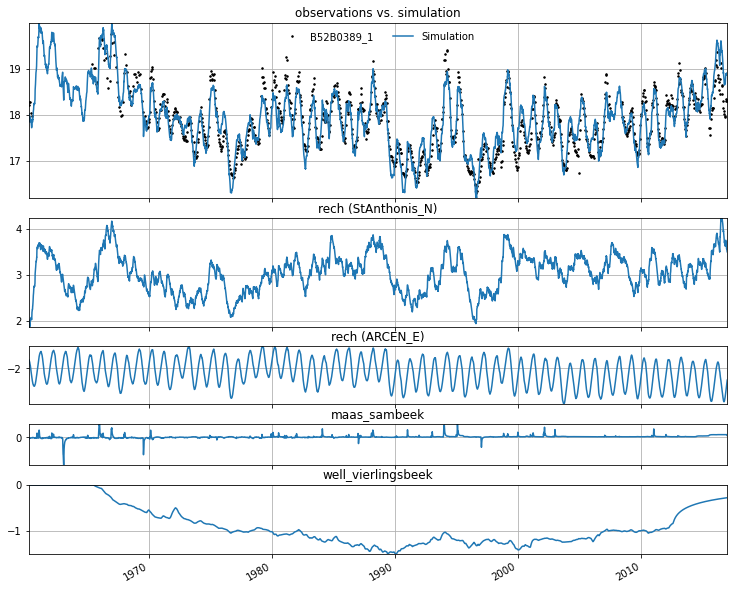

In [19]:
ml2.plots.decomposition();

# Pastas - Original Riverlevels (non-linear recharge model)

In [18]:
ml3 = ps.Model(ho)
sm1 = ps.RechargeModel(prec[-3], evap[1], ps.Gamma, recharge=ps.rch.FlexModel(), name='rech')
sm2 = ps.StressModel(ws_sambeek, ps.Polder, name='maas_sambeek') #other timeseries for the maas
sm3 = ps.StressModel(well[1], ps.Hantush, name='well_vierlingsbeek', settings='well', up=False) #distance=4000, 
ml3.add_stressmodel([sm1,sm2,sm3])
ml3.solve(noise=True)

INFO: Cannot determine frequency of series B52B0389_1: freq=None. The time series is irregular.
INFO: Time Series B52B0389_1: 18 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Onttrekking_Vierlingsbeek were sampled up using bfill.
INFO: Time Series StAnthonis_N was extended to 1950-04-18 00:00:00 with the mean value of the time series.
INFO: Time Series ARCEN_E was extended to 1950-04-18 00:00:00 with the mean value of the time series.
INFO: Time Series Onttrekking_Vierlingsbeek were sampled up using bfill.
INFO: Time Series Onttrekking_Vierlingsbeek was extended to 1950-04-18 00:00:00 by adding 0.0 values.
INFO: Time Series Onttrekking_Vierlingsbeek was extended to 2017-01-06 00:00:00 by adding 0.0 values.


Fit report B52B0389_1                              Fit Statistics
nfev     62                     EVP                            72.39
nobs     1172                   R2                              0.72
noise    True                   RMSE                            0.34
tmin     1960-04-15 00:00:00    AIC                            24.19
tmax     2017-01-06 00:00:00    BIC                           110.32
freq     D                      Obj                             7.42
warmup   3650 days 00:00:00     ___                                 
solver   LeastSquares           Interpolated                      No

Parameters (14 were optimized)
                          optimal         stderr      initial   vary
rech_A                     832.14         ±8.95%       11.475   True
rech_n                    2.06765         ±0.48%            1   True
rech_a                  0.0121543         ±0.02%           10   True
rech_srmax                 548.21     ±13990.71%          250   True
rech_

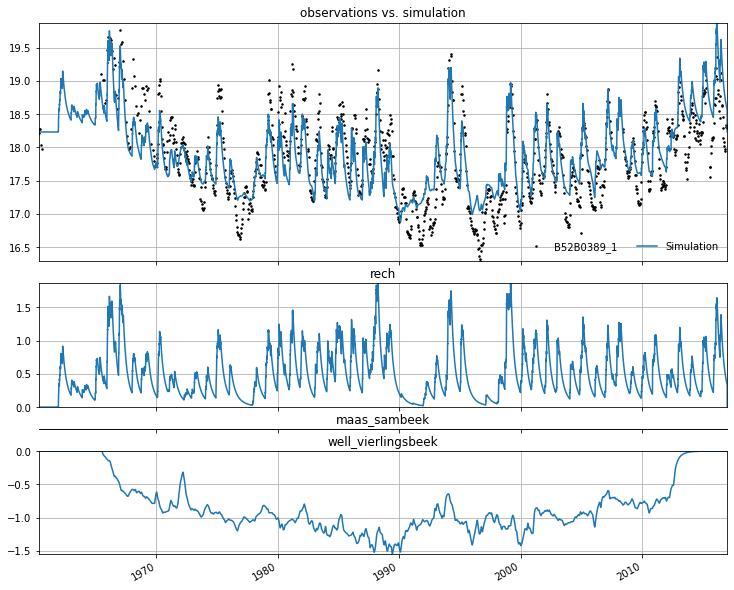

In [19]:
ml3.plots.decomposition();

In [16]:
ml4 = ps.Model(ho)
sm1 = ps.RechargeModel(prec[-3], evap[1], ps.Gamma, recharge=ps.rch.FlexModel(), name='rech')
sm2 = ps.StressModel(ws_sambeek_norm, ps.Polder, name='maas_sambeek') #other timeseries for the maas
sm3 = ps.StressModel(well[1], ps.Hantush, name='well_vierlingsbeek', settings='well', up=False) #distance=4000, 
ml4.add_stressmodel([sm1,sm2,sm3])
ml4.solve(noise=True)

INFO: Cannot determine frequency of series B52B0389_1: freq=None. The time series is irregular.
INFO: Time Series B52B0389_1: 18 nan-value(s) was/were found and filled with: drop.
INFO: Inferred frequency for time series Sambeek boven: freq=D
INFO: Time Series Onttrekking_Vierlingsbeek were sampled up using bfill.
INFO: Time Series StAnthonis_N was extended to 1950-04-18 00:00:00 with the mean value of the time series.
INFO: Time Series ARCEN_E was extended to 1950-04-18 00:00:00 with the mean value of the time series.
INFO: Time Series Onttrekking_Vierlingsbeek were sampled up using bfill.
INFO: Time Series Onttrekking_Vierlingsbeek was extended to 1950-04-18 00:00:00 by adding 0.0 values.
INFO: Time Series Onttrekking_Vierlingsbeek was extended to 2017-01-06 00:00:00 by adding 0.0 values.


Fit report B52B0389_1                           Fit Statistics
nfev     61                     EVP                         24.05
nobs     1172                   R2                           0.24
noise    True                   RMSE                         0.56
tmin     1960-04-15 00:00:00    AIC                         22.18
tmax     2017-01-06 00:00:00    BIC                        108.31
freq     D                      Obj                         13.51
warmup   3650 days 00:00:00     ___                              
solver   LeastSquares           Interpolated                   No

Parameters (14 were optimized)
                         optimal       stderr      initial   vary
rech_A                    593.77     ±998.83%       11.475   True
rech_n                   99.9826     ±719.56%            1   True
rech_a                   51.7045     ±701.81%           10   True
rech_srmax               731.149   ±35340.05%          250   True
rech_lp                     0.25        ±nan%  

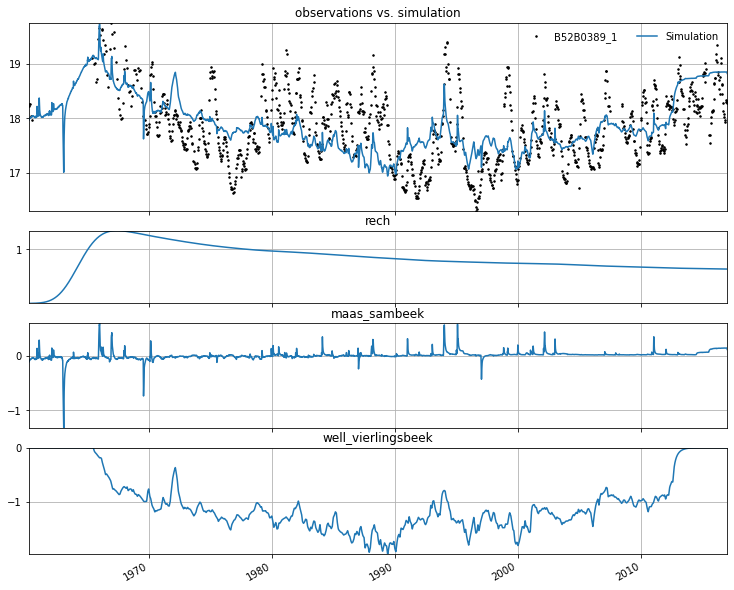

In [17]:
ml4.plots.decomposition();

Bij het flexmodel gaat pastas de mist in voor zowel de genormaliseerde grondwaterstand, als de originele